In [1]:
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import ml_helpers

In [2]:
_rand_amount_to_make = 1000

# Make random dates
start_date = datetime.date(2020,1,4)
end_date = datetime.date(2020,11,23)
rand_dates = ml_helpers.gen_random_dates(start_date, end_date, _rand_amount_to_make)

# Make random profit loss values
rand_arr = 1000 * np.random.randn(_rand_amount_to_make)
rand_arr = rand_arr.tolist()

In [3]:
df = pd.DataFrame(dict(dates=rand_dates, profit_loss=rand_arr))
df['dates'] = pd.to_datetime(df.dates)

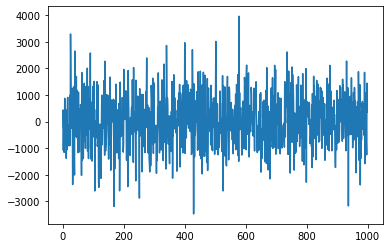

In [4]:
plt.plot(df.profit_loss)

In [5]:
df['pl_pct'] = df.profit_loss.pct_change()

feature_names = ['profit_loss']

ma_periods = [5, 20, 30, 50, 100]
for i in ma_periods:
    ma_name = 'ma_' + str(i)
    feature_names.append(ma_name)
    df[ma_name] = df.profit_loss.rolling(i).mean()

df = df.dropna()

In [6]:
features = df[feature_names]
targets = df['pl_pct']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.25, shuffle=False)

In [9]:
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = y_train.values
y_test = y_test.values

In [10]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

RMSE Train: 21.308103717854284
RMSE Test: 63.17361724051753

R2 Train: 0.7129683275191077
R2 Test: -0.004214029186287327



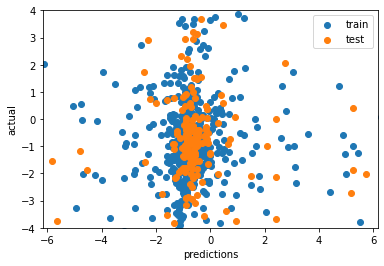

In [11]:
rfr = RandomForestRegressor(n_estimators=200,
                            max_depth=5,
                            max_features=2,
                            min_samples_split=4,
                            oob_score=True,
                            random_state=44)

ml_helpers.model_res(rfr, X_train, X_test, y_train, y_test)

RMSE Train: 36.984593208865164
RMSE Test: 63.207714561559904

R2 Train: 0.1352672446160219
R2 Test: -0.005298350466702573



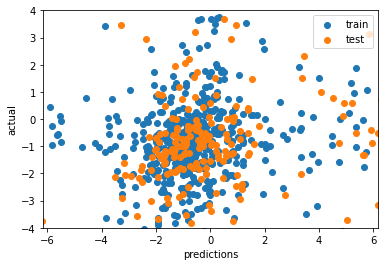

In [12]:
knn = KNeighborsRegressor(n_neighbors=7)
ml_helpers.model_res(knn, X_train, X_test, y_train, y_test)

In [13]:
# Ensembling

models = [rfr, knn]

train_preds = []
test_preds = []

for model in models:
    train_pred = model.predict(X_train).reshape(1, -1)
    test_pred = model.predict(X_test).reshape(1, -1)

    train_preds.append(train_pred)
    test_preds.append(test_pred)

train_preds_mean = np.mean(np.vstack(tuple(train_preds)), axis=0)
test_preds_mean = np.mean(np.vstack(tuple(test_preds)), axis=0)

RMSE Train: 28.538159892635544
RMSE Test: 63.135764227291176

R2 Train: 0.48513644483553964
R2 Test: -0.0030109592902851645



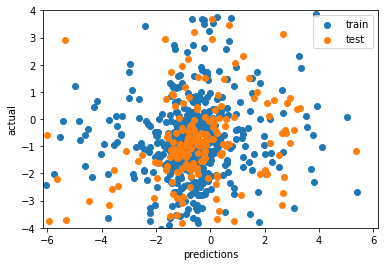

In [14]:
ml_helpers.plot_predict(y_train, y_test, train_preds_mean, test_preds_mean)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [17]:
input_dim = len(feature_names)

In [52]:
seq = Sequential()
seq.add(Dense(4, activation='relu', input_dim=input_dim))
seq.add(Dense(1, activation='linear'))
seq.compile(optimizer='adam', loss='mse')

22/22 [==============================] - 0s 2ms/step - loss: 1582.9606
RMSE Train: 39.78441027937113
RMSE Test: 63.111173128940536

R2 Train: -0.0006128303375505517
R2 Test: -0.0022297748707316156



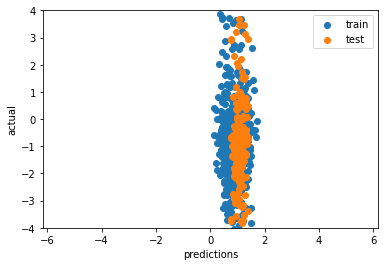

In [53]:
ml_helpers.model_res(seq, X_train, X_test, y_train, y_test)

In [33]:
from xgboost import XGBRegressor


In [60]:
xgbr = XGBRegressor(objective='reg:squarederror',
                    learning_rate=0.1,
                    colsample_bytree=0.1,
                    n_estimators=50,
                    max_depth=3,
                    random_state=44)

RMSE Train: 13.056131434000388
RMSE Test: 63.65978597620293

R2 Train: 0.8922371064244565
R2 Test: -0.019729875438111444



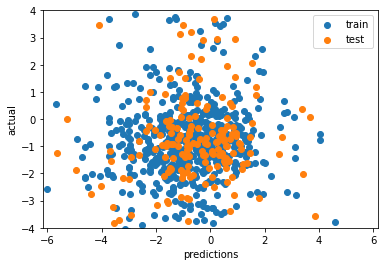

In [61]:
ml_helpers.model_res(xgbr, X_train, X_test, y_train, y_test)